In [34]:
import pandas as pd

df = pd.read_csv("../../data/norway_new_car_sales_by_month.csv")

df.head()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               121 non-null    int64  
 1   Month              121 non-null    int64  
 2   Quantity           121 non-null    int64  
 3   Quantity_YoY       121 non-null    int64  
 4   Import             121 non-null    int64  
 5   Import_YoY         121 non-null    int64  
 6   Used               61 non-null     float64
 7   Used_YoY           49 non-null     float64
 8   Avg_CO2            121 non-null    int64  
 9   Bensin_Co2         121 non-null    int64  
 10  Diesel_Co2         121 non-null    int64  
 11  Quantity_Diesel    121 non-null    int64  
 12  Diesel_Share       121 non-null    float64
 13  Diesel_Share_LY    121 non-null    float64
 14  Quantity_Hybrid    73 non-null     float64
 15  Quantity_Electric  73 non-null     float64
 16  Import_Electric    53 non-

In [36]:
df.describe()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,61.000000,49.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,73.000000,73.000000,53.000000
mean,2011.545455,6.454545,11134.297521,392.586777,2204.371901,-135.049587,36864.737705,973.122449,129.520661,133.735537,141.396694,6582.355372,60.512397,62.278512,1255.219178,1154.109589,306.924528
std,2.915476,3.488075,1752.046397,1789.539953,573.127896,545.395787,4230.548664,2728.915662,22.719338,17.094233,10.847795,1596.675812,15.802049,13.128647,1059.443502,875.792142,165.086906
min,2007.000000,1.000000,5353.000000,-4548.000000,1048.000000,-1810.000000,24106.000000,-6261.000000,84.000000,94.000000,118.000000,3422.000000,26.300000,38.000000,159.000000,43.000000,33.000000
25%,2009.000000,3.000000,10250.000000,-526.000000,1812.000000,-495.000000,34212.000000,-392.000000,110.000000,120.000000,133.000000,5434.000000,48.500000,49.400000,443.000000,309.000000,197.000000
50%,2012.000000,6.000000,11385.000000,493.000000,2263.000000,-114.000000,37079.000000,855.000000,132.000000,131.000000,136.000000,6583.000000,68.700000,68.700000,899.000000,1260.000000,286.000000
75%,2014.000000,9.000000,12337.000000,1445.000000,2625.000000,162.000000,39797.000000,2708.000000,151.000000,150.000000,151.000000,7808.000000,73.700000,74.000000,1556.000000,1906.000000,433.000000
max,2017.000000,12.000000,14207.000000,5227.000000,3768.000000,1334.000000,44106.000000,5896.000000,162.000000,165.000000,166.000000,10072.000000,81.400000,81.400000,4419.000000,3391.000000,746.000000


In [37]:
df.shape

(121, 17)

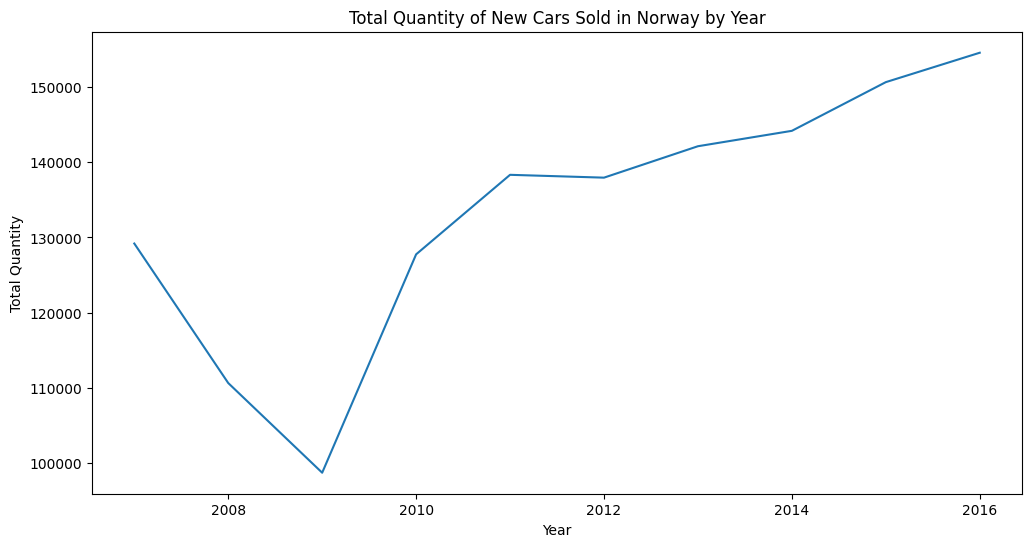

In [38]:
import matplotlib.pyplot as plt

df = df_full_months = df[:-1] # Removing the last row (2017), which is only one month in a year

quantity_per_year = df_full_months.groupby("Year")["Quantity"].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(quantity_per_year["Year"], quantity_per_year["Quantity"])
plt.title("Total Quantity of New Cars Sold in Norway by Year")
plt.xlabel("Year")
plt.ylabel("Total Quantity")
plt.show()

In [39]:
# Duckdb version to find years with full data

import duckdb

df_full_months = duckdb.query(
    """
    SELECT  
        Year,
        COUNT(*) AS months_with_full_data
    FROM df
    GROUP BY Year
    HAVING COUNT(*) = 12
    ORDER BY Year
      
"""
).df()

print(df_full_months)

   Year  months_with_full_data
0  2007                     12
1  2008                     12
2  2009                     12
3  2010                     12
4  2011                     12
5  2012                     12
6  2013                     12
7  2014                     12
8  2015                     12
9  2016                     12


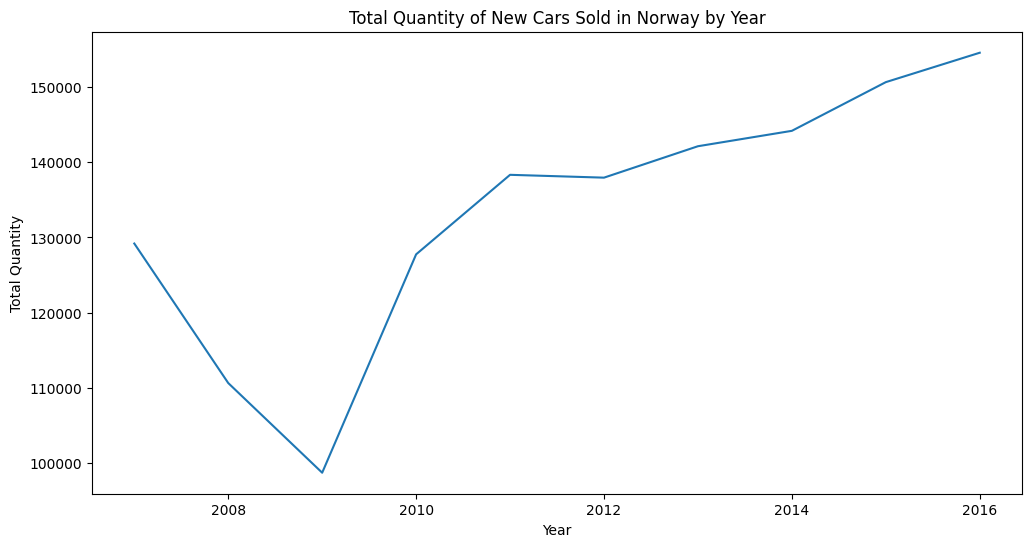

In [40]:
quantity_per_year = df[df["Year"].isin(df_full_months["Year"])].groupby("Year")["Quantity"].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(quantity_per_year["Year"], quantity_per_year["Quantity"])
plt.title("Total Quantity of New Cars Sold in Norway by Year")
plt.xlabel("Year")
plt.ylabel("Total Quantity")
plt.show()


In [41]:
df_full_months.head(15)

,Year,months_with_full_data
0,2007,12
1,2008,12
2,2009,12
3,2010,12
4,2011,12
5,2012,12
6,2013,12
7,2014,12
8,2015,12
9,2016,12


In [48]:
full_years = df_full_months["Year"].unique()

filtered_df = df[df["Year"].isin(full_years)]
avg_co2_per_year = filtered_df.groupby("Year")["Avg_CO2"].mean().reset_index()
avg_co2_per_year.head(10)

,Year,Avg_CO2
0,2007,159.000000
1,2008,158.000000
2,2009,150.916667
3,2010,140.666667
4,2011,134.000000
5,2012,129.916667
6,2013,123.000000
7,2014,110.416667
8,2015,99.750000
9,2016,93.333333


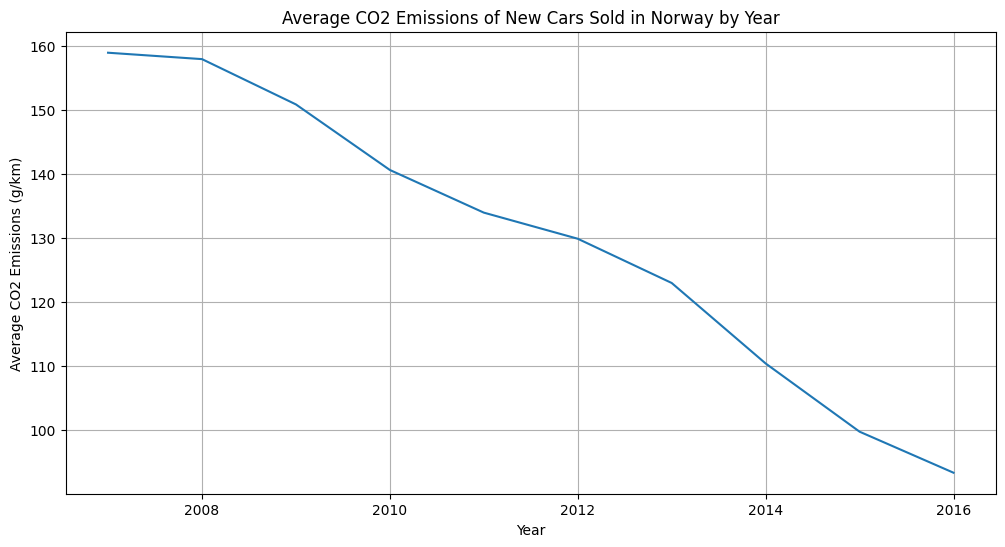

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(avg_co2_per_year["Year"], avg_co2_per_year["Avg_CO2"])
plt.title("Average CO2 Emissions of New Cars Sold in Norway by Year")
plt.xlabel("Year")
plt.ylabel("Average CO2 Emissions (g/km)")
plt.grid(True)
plt.show()

In [56]:
df.head()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN
